In [1]:
# ============================================================================
# NOTEBOOK 1: BASELINE DRAKE EQUATION EXPLORATION
# ============================================================================
# 
# This notebook explores the Drake Equation using baseline parameter distributions.
# 
# Drake Equation: N = R★ × fp × ne × fl × fi × fc × L
# 
# Where:
# - R★: Star formation rate (stars/year)
# - fp: Fraction of stars with planets
# - ne: Number of habitable planets per system
# - fl: Fraction where life arises
# - fi: Fraction where intelligence evolves
# - fc: Fraction that develop communication
# - L: Lifetime of civilization (years)
# - N: Number of detectable civilizations in the galaxy

# ============================================================================
# CELL 1: IMPORTS
# ============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from drake.Parameters import BASELINE_PARAMS
from drake.Simulation import simulate_once
from drake.monte_carlo import run_monte_carlo

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Imports successful")

✓ Imports successful


In [3]:
# ============================================================================
# CELL 2: SINGLE SIMULATION
# ============================================================================

# Run a single simulation
single_result = simulate_once(BASELINE_PARAMS)

print("Single Simulation Results:")
print("="*50)
for key, value in single_result.items():
    if key == 'N':
        print(f"\n{key:10} = {value:,.2f} civilizations")
    else:
        print(f"{key:10} = {value:.4f}")

Single Simulation Results:
R_star     = 1.9235
fp         = 0.9745
ne         = 0.2307
fl         = 0.6676
fi         = 0.0225
fc         = 0.3346
L          = 212.4076

N          = 0.46 civilizations


In [77]:
# ============================================================================
# CELL 3: MONTE CARLO SIMULATION (ROBUST VERSION)
# ============================================================================

# Run Monte Carlo with 1,000 simulations
n_sims = 1000
mc_results = run_monte_carlo(BASELINE_PARAMS, n_simulations=n_sims)

# Check the structure and extract accordingly
print(f"Type of mc_results: {type(mc_results)}")

if isinstance(mc_results, pd.DataFrame):
    # It's a DataFrame with packed results
    raw_results = mc_results['raw'].iloc[0] if hasattr(mc_results['raw'], 'iloc') else mc_results['raw'][0]
    N_values = mc_results['N'].iloc[0] if hasattr(mc_results['N'], 'iloc') else mc_results['N'][0]
    summary = mc_results['summary'].iloc[0] if hasattr(mc_results['summary'], 'iloc') else mc_results['summary'][0]
elif isinstance(mc_results, dict):
    # It's a dictionary
    raw_results = mc_results['raw']
    N_values = mc_results['N']
    summary = mc_results['summary']
else:
    # It's something else (list, etc.)
    raise ValueError(f"Unexpected mc_results type: {type(mc_results)}")

# Convert raw results to DataFrame
df = pd.DataFrame(raw_results)

# Ensure N column exists
if 'N' not in df.columns:
    df['N'] = N_values

print(f"\nMonte Carlo Results ({len(df):,} simulations):")
print("="*50)
print(f"DataFrame shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"\nMean N:     {summary['mean']:,.2f}")
print(f"Median N:   {summary['median']:,.2f}")
print(f"Std Dev:    {summary['std']:,.2f}")

Type of mc_results: <class 'dict'>

Monte Carlo Results (1,000 simulations):
DataFrame shape: (1000, 8)
Columns: ['R_star', 'fp', 'ne', 'fl', 'fi', 'fc', 'L', 'N']

Mean N:     0.70
Median N:   0.27
Std Dev:    2.04


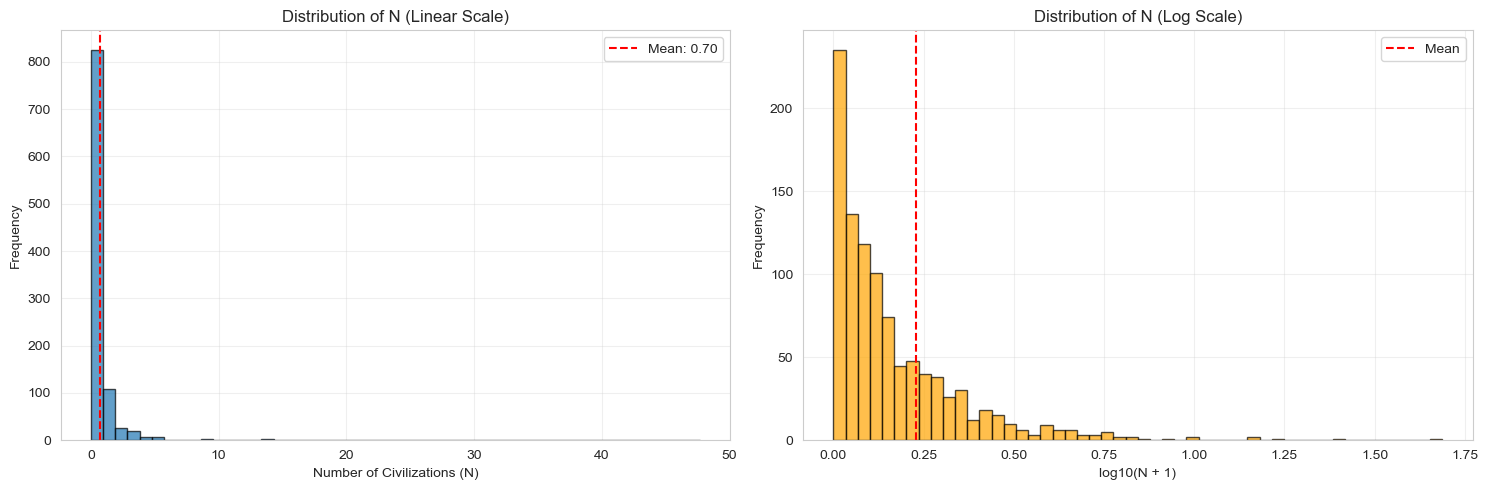

In [79]:
# ============================================================================
# CELL 4: DISTRIBUTION VISUALIZATION
# ============================================================================

# Plot distribution of N
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Linear scale
axes[0].hist(df['N'], bins=50, alpha=0.7, edgecolor='black')
axes[0].axvline(summary['mean'], color='red', linestyle='--', label=f"Mean: {summary['mean']:.2f}")
axes[0].set_xlabel('Number of Civilizations (N)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of N (Linear Scale)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Log scale
axes[1].hist(np.log10(df['N'] + 1), bins=50, alpha=0.7, edgecolor='black', color='orange')
axes[1].axvline(np.log10(summary['mean'] + 1), color='red', linestyle='--', label='Mean')
axes[1].set_xlabel('log10(N + 1)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of N (Log Scale)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

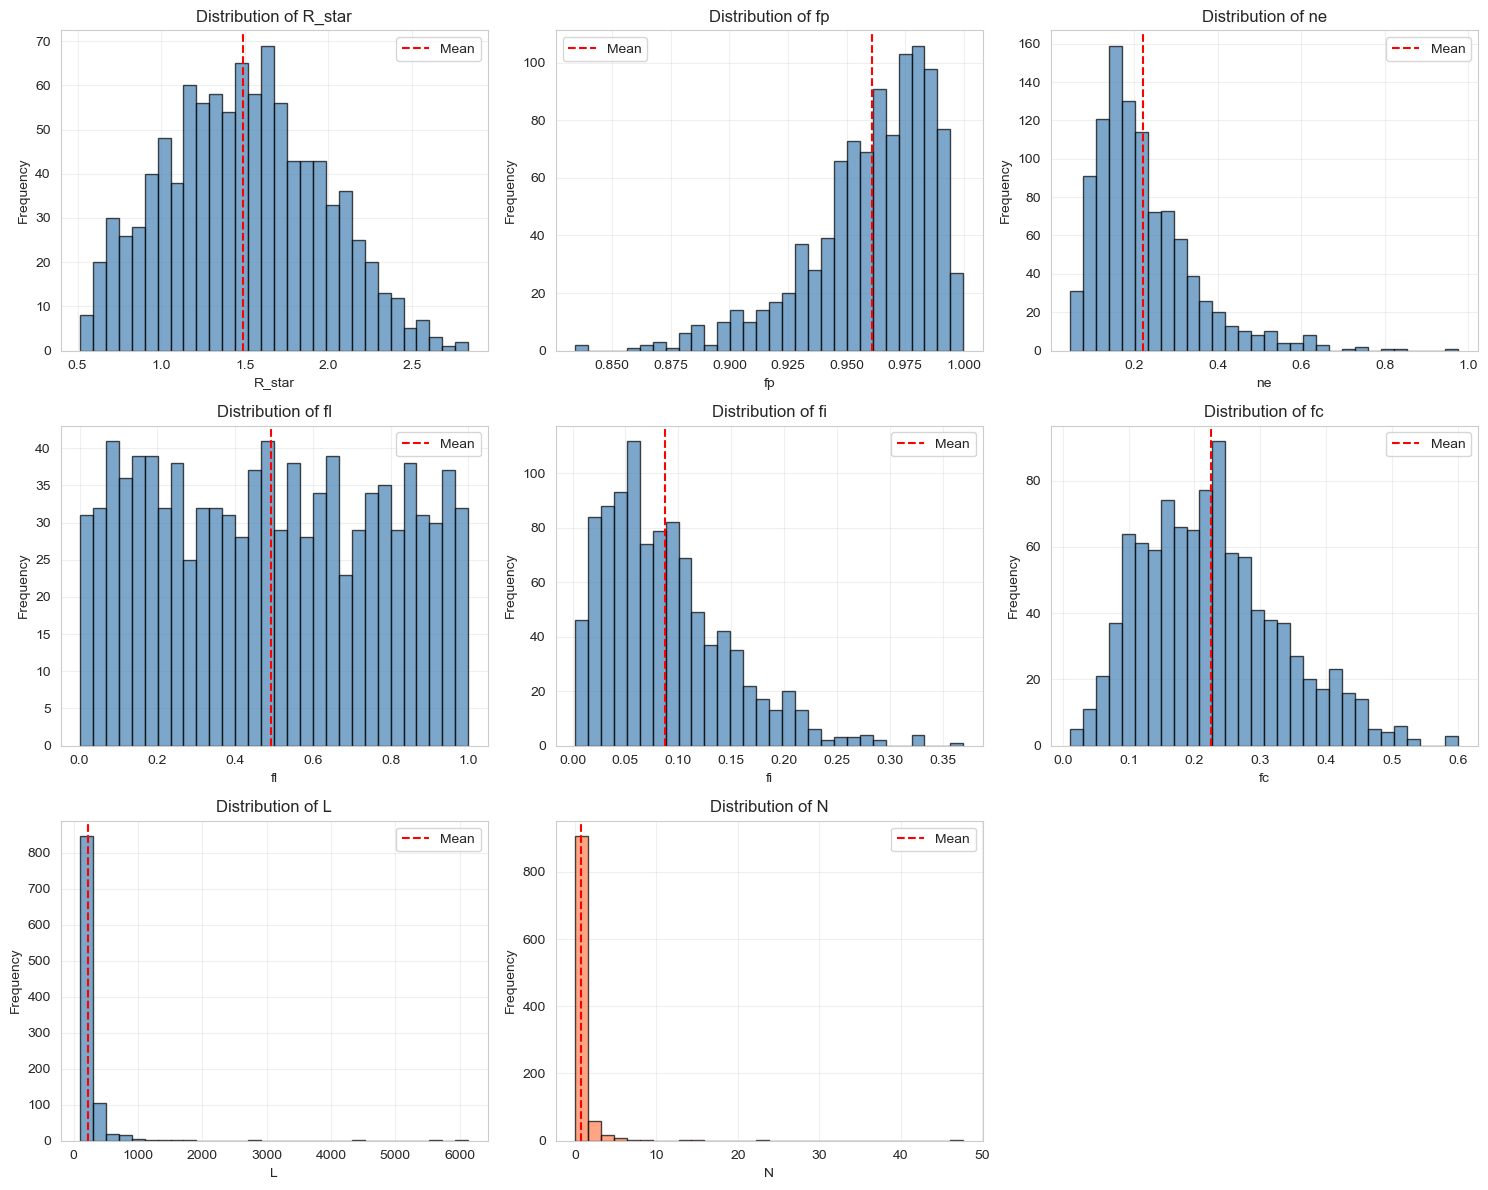

In [81]:
# ============================================================================
# CELL 5: PARAMETER DISTRIBUTIONS
# ============================================================================

# Plot all parameter distributions
params = ['R_star', 'fp', 'ne', 'fl', 'fi', 'fc', 'L']
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, param in enumerate(params):
    axes[idx].hist(df[param], bins=30, alpha=0.7, edgecolor='black', color='steelblue')
    axes[idx].axvline(df[param].mean(), color='red', linestyle='--', label='Mean')
    axes[idx].set_xlabel(param)
    axes[idx].set_ylabel('Frequency')
    axes[idx].set_title(f'Distribution of {param}')
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

# Plot N in the last subplot
axes[7].hist(df['N'], bins=30, alpha=0.7, edgecolor='black', color='coral')
axes[7].axvline(summary['mean'], color='red', linestyle='--', label='Mean')
axes[7].set_xlabel('N')
axes[7].set_ylabel('Frequency')
axes[7].set_title('Distribution of N')
axes[7].legend()
axes[7].grid(True, alpha=0.3)

# Hide the extra subplot
axes[8].axis('off')

plt.tight_layout()
plt.show()

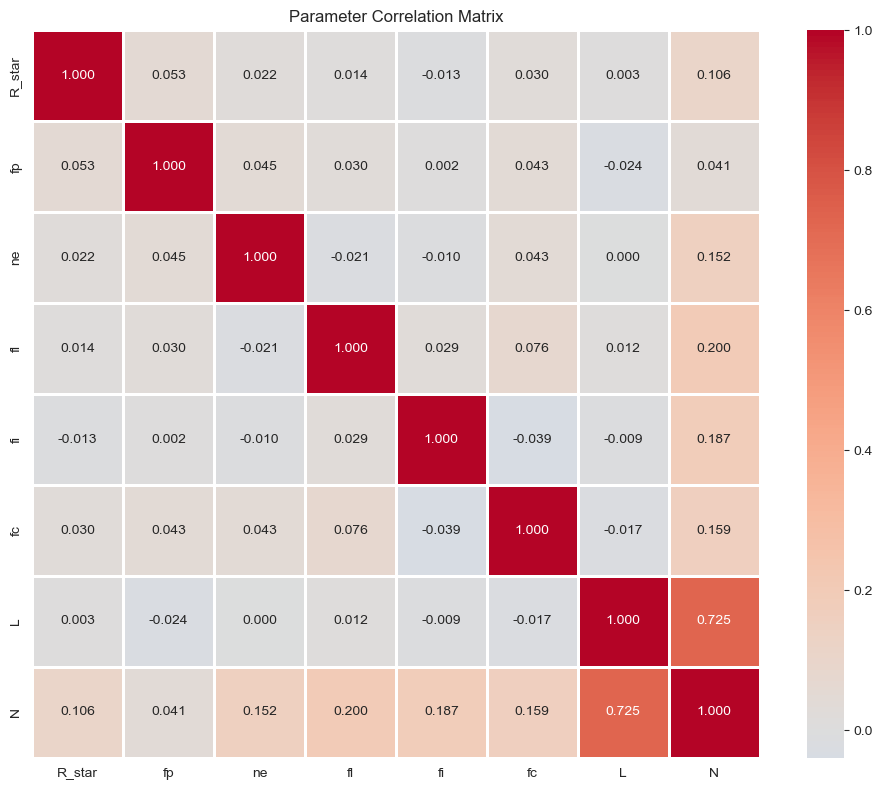


Correlations with N:
L          : +0.7252
fl         : +0.1997
fi         : +0.1868
fc         : +0.1595
ne         : +0.1517
R_star     : +0.1061
fp         : +0.0410


In [83]:
# ============================================================================
# CELL 6: CORRELATION ANALYSIS
# ============================================================================

# Calculate correlations
correlation_matrix = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Parameter Correlation Matrix')
plt.tight_layout()
plt.show()

# Print correlations with N
print("\nCorrelations with N:")
print("="*50)
n_corr = correlation_matrix['N'].drop('N').sort_values(ascending=False)
for param, corr in n_corr.items():
    print(f"{param:10} : {corr:+.4f}")

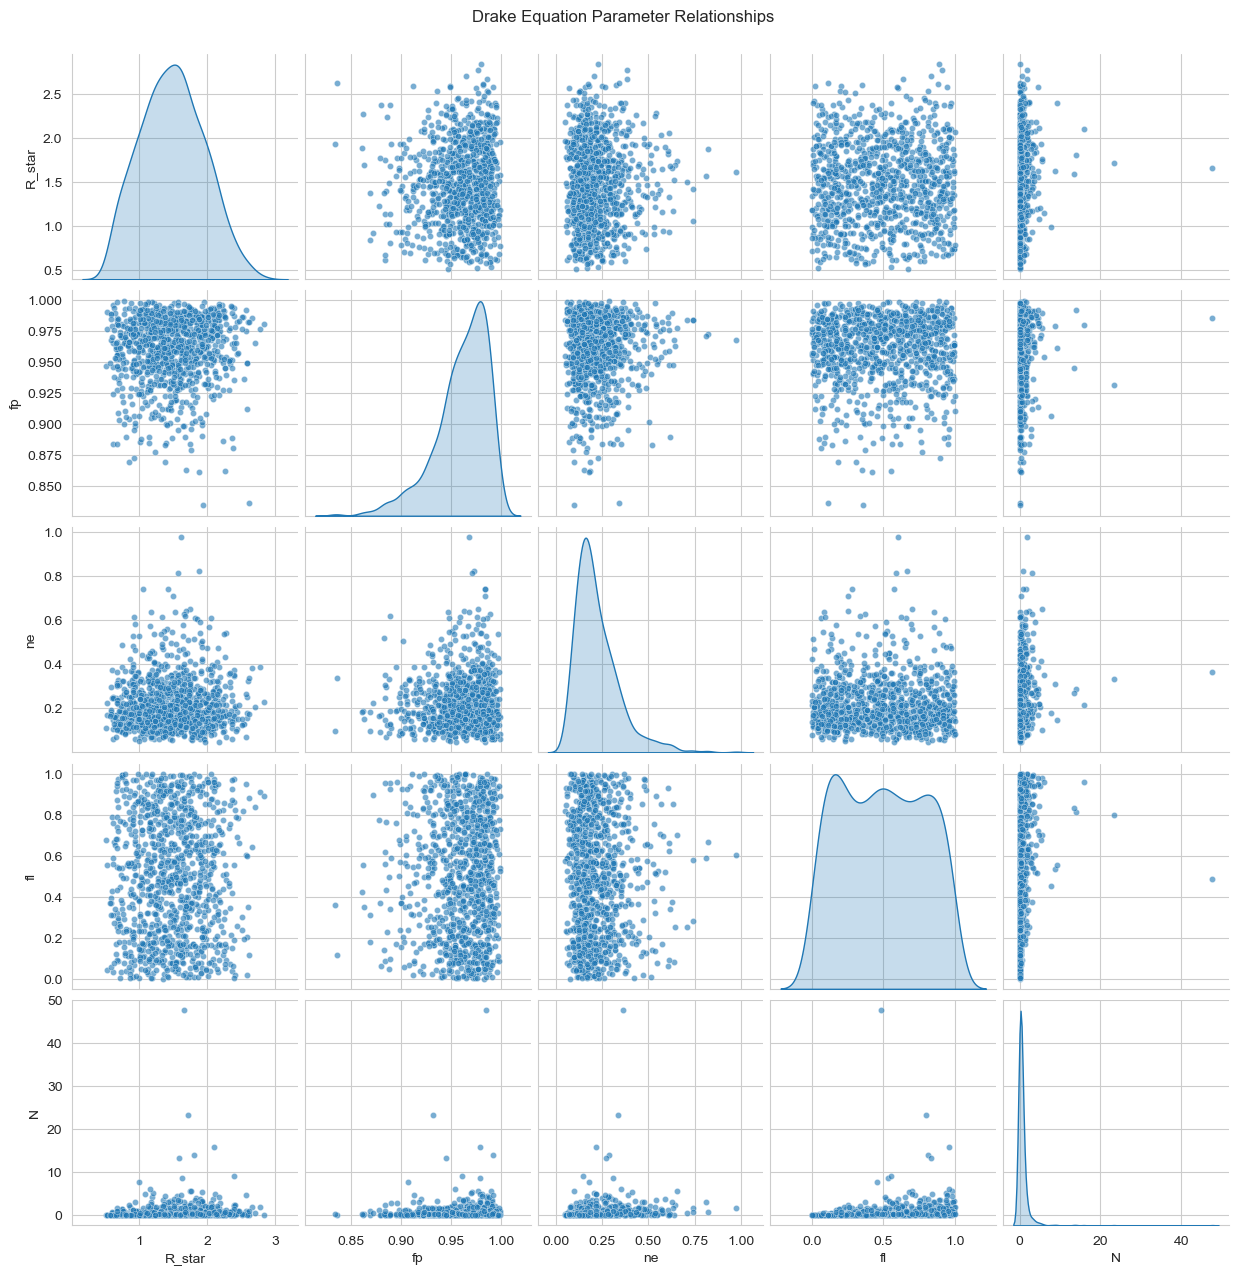

In [95]:
# ============================================================================
# CELL 7: SCATTER PLOT MATRIX
# ============================================================================

# Sample 1000 points for visualization
sample_df = df.sample(min(1000, len(df)))

# Create pairplot
pairplot = sns.pairplot(sample_df[['R_star', 'fp', 'ne', 'fl', 'N']], 
                        diag_kind='kde', 
                        plot_kws={'alpha': 0.6, 's': 20})
pairplot.fig.suptitle('Drake Equation Parameter Relationships', y=1.02)
plt.show()

Probability of N exceeding threshold:
P(N > 1): 16.60%
P(N > 10): 0.50%
P(N > 100): 0.00%
P(N > 1,000): 0.00%
P(N > 10,000): 0.00%


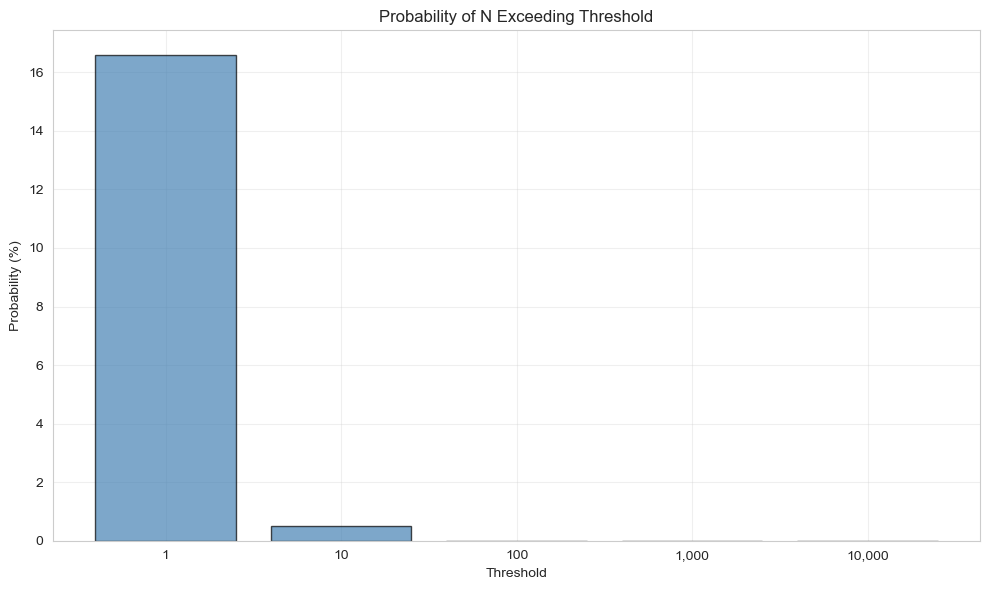

In [87]:
# ============================================================================
# CELL 8: PROBABILITY ANALYSIS
# ============================================================================

# Calculate probabilities for different thresholds
thresholds = [1, 10, 100, 1000, 10000]

print("Probability of N exceeding threshold:")
print("="*50)
for threshold in thresholds:
    prob = (df['N'] > threshold).mean() * 100
    print(f"P(N > {threshold:,}): {prob:.2f}%")

# Visualize
probs = [(df['N'] > t).mean() * 100 for t in thresholds]

plt.figure(figsize=(10, 6))
plt.bar(range(len(thresholds)), probs, color='steelblue', alpha=0.7, edgecolor='black')
plt.xticks(range(len(thresholds)), [f'{t:,}' for t in thresholds])
plt.xlabel('Threshold')
plt.ylabel('Probability (%)')
plt.title('Probability of N Exceeding Threshold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [89]:
# ============================================================================
# CELL 9: SUMMARY STATISTICS TABLE
# ============================================================================

# Create comprehensive summary table
summary_stats = df.describe().T
summary_stats['median'] = df.median()
summary_stats = summary_stats[['mean', 'median', 'std']]

print("\nComprehensive Parameter Statistics:")
print("="*80)
print(summary_stats.to_string())

# Save results
summary_stats.to_csv('baseline_summary_stats.csv')
print("\n✓ Summary statistics saved to 'baseline_summary_stats.csv'")


Comprehensive Parameter Statistics:
              mean      median         std
R_star    1.488422    1.479356    0.464604
fp        0.960674    0.965401    0.026566
ne        0.222793    0.191664    0.119821
fl        0.493044    0.489399    0.290740
fi        0.087477    0.076220    0.058732
fc        0.225508    0.216504    0.105192
L       223.565798  145.426615  343.718924
N         0.699073    0.272794    2.043045

✓ Summary statistics saved to 'baseline_summary_stats.csv'
